## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [24]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [26]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [27]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [28]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [30]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [31]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [32]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [33]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

print(numeric_features)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [34]:
df['total_score']= df['math_score']+ df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

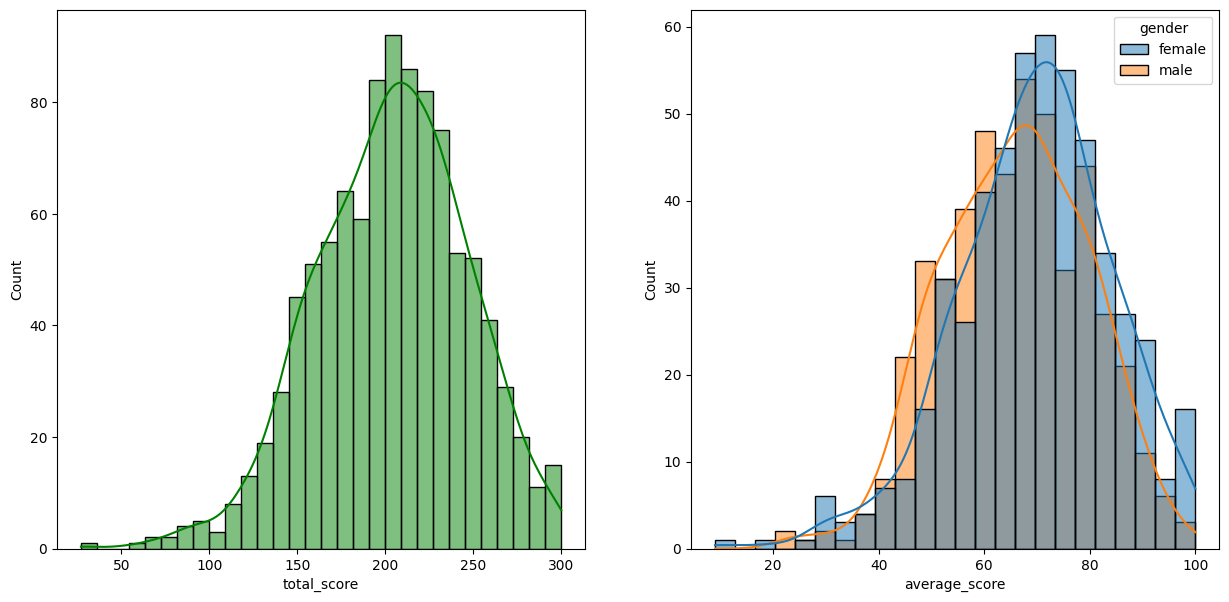

In [36]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

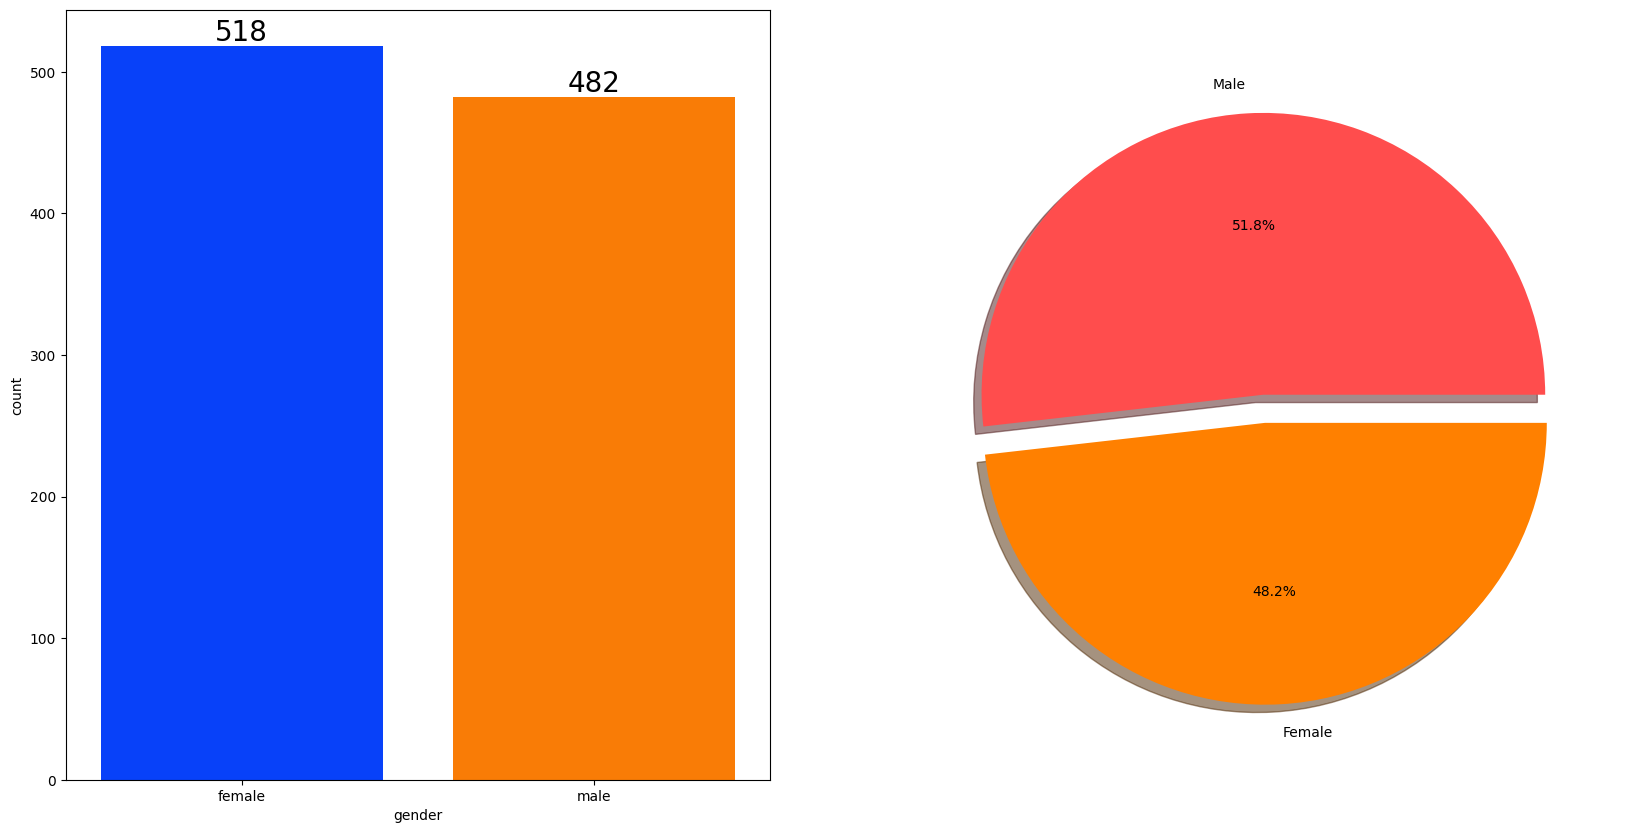

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.